<a href="https://colab.research.google.com/github/hijera/NN_colab_hw/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%9F%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D1%8B_(%D0%92%D0%BB%D0%B0%D1%81%D0%BE%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Скачайте текст произведения «Война и мир»: ссылка на GitHub и Google Drive.
2. Очистите его, оставив только русские буквы и символы пробела.
3. Постройте матрицу переходных вероятностей.
4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».
5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.
6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.


In [1]:
#Скачиваем
!wget https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt
!wget https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_2.txt
!wget https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_3.txt
!wget https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_4.txt

--2023-11-16 04:06:45--  https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1273582 (1.2M) [text/plain]
Saving to: ‘tom_1.txt’

tom_1.txt           100%[===================>]   1.21M  --.-KB/s    in 0.07s   

2023-11-16 04:06:46 (16.8 MB/s) - ‘tom_1.txt’ saved [1273582/1273582]

--2023-11-16 04:06:46--  https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP requ

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [36]:
text=''
files=["tom_1.txt","tom_2.txt","tom_3.txt","tom_4.txt"]
for filename in files:
  with open(filename, 'r') as f:
      text += f.read().lower()
text = re.sub('[^а-яё ]','', text)

In [43]:
RU = 'абвгдеёжзийклмнопрстуфхчцшщъыьэюя '
POS = {l: i for i, l in enumerate(RU)}

In [44]:
probabilities = np.zeros((len(RU), len(RU)))

In [45]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [46]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [47]:
df = pd.DataFrame(probabilities, index=(c for c in RU), columns=(c for c in RU))
df

,а,б,в,г,д,е,ё,ж,з,и,...,ц,ш,щ,ъ,ы,ь,э,ю,я,
а,0.000196,0.008748,0.047077,0.012012,0.027278,0.013674,0.000000,0.016752,0.056727,0.001858,...,0.000966,0.018371,0.003376,0.000000,0.000000,0.000000,0.000042,0.010887,0.034136,0.237949
б,0.065245,0.000600,0.005402,0.000675,0.001525,0.141918,0.000025,0.000450,0.000050,0.048690,...,0.000200,0.000300,0.013454,0.006777,0.272507,0.002501,0.000025,0.000275,0.029309,0.014904
в,0.138951,0.000432,0.001043,0.000977,0.007827,0.111638,0.000009,0.000028,0.012524,0.078979,...,0.000319,0.030019,0.000103,0.000338,0.063768,0.004134,0.000009,0.000019,0.005186,0.163295
г,0.056217,0.000000,0.002363,0.000066,0.062355,0.030714,0.000000,0.000066,0.000088,0.043013,...,0.000088,0.000420,0.000000,0.000000,0.000066,0.000110,0.000000,0.000199,0.000066,0.046744
д,0.165234,0.001248,0.037191,0.000298,0.001050,0.170894,0.000028,0.000539,0.000099,0.095730,...,0.005688,0.004695,0.000014,0.006553,0.023404,0.015262,0.000028,0.001645,0.016156,0.041844
е,0.000480,0.016026,0.021478,0.049143,0.037187,0.023199,0.000011,0.014965,0.017224,0.002718,...,0.003125,0.009602,0.008641,0.000000,0.000000,0.000000,0.000021,0.003838,0.005078,0.239995
ё,0.000000,0.000000,0.001970,0.002956,0.001970,0.000000,0.000000,0.001970,0.001970,0.000000,...,0.000000,0.001970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.920197
ж,0.149059,0.005917,0.000000,0.001469,0.081405,0.410577,0.000000,0.002081,0.000000,0.151140,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004489,0.000041,0.003142,0.000000,0.021912
з,0.357291,0.011746,0.053735,0.026740,0.045794,0.016059,0.000000,0.010909,0.004973,0.023620,...,0.000279,0.000685,0.000000,0.001066,0.038030,0.040669,0.000000,0.004592,0.031764,0.087097
и,0.001461,0.007315,0.043226,0.008590,0.026750,0.046781,0.000000,0.006764,0.033816,0.014355,...,0.020146,0.006015,0.002447,0.000000,0.000000,0.000006,0.000051,0.006028,0.031862,0.331151


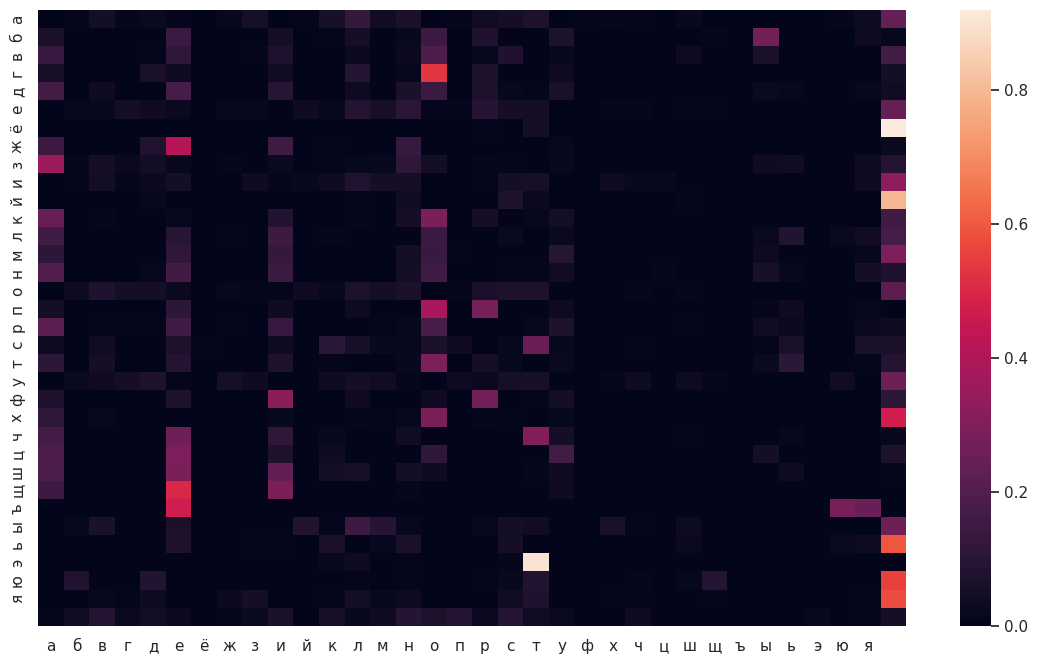

In [48]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Что интересно - после э с большой вероятностью идет т

In [49]:
#Считаем вероятность, что у нас есть слово из 4 символов, начинающееся на П, и заканчивающееся на Р
start = POS['п']
end = POS['р']
prior = 1. / len(RU) #Можно убрать пробел через [:-1] , вероятность станет выше
for c1 in RU[:-1]:
  for c2 in RU[:-1]:
    proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1],POS[c2]] * probabilities[POS[c2], end]
    if proba > 0:
        print(''.join(['п', c1,c2, 'р']), proba)

паар 1.2483021244621608e-08
пабр 1.0155553856672825e-06
павр 1.15917977686471e-06
пагр 1.2848114697473956e-06
падр 2.942105165838902e-06
паер 1.9503146628298786e-06
пажр 7.311949848239609e-09
пазр 1.2095790878783555e-06
паир 2.547790864803073e-08
пайр 2.7599678947720997e-08
пакр 4.83849984690539e-06
палр 3.3611556905914123e-09
памр 1.0930948458598652e-07
панр 1.161326477180596e-07
паор 4.339681014540716e-08
папр 5.626388035700382e-06
парр 2.870279020272537e-08
паср 5.043304580053417e-07
патр 5.524111015460852e-06
паур 6.923602698965342e-08
пафр 3.17685218286211e-06
пахр 2.440818119506081e-07
пачр 2.6506060145138035e-08
пашр 5.266004634220631e-09
пащр 4.5451641687422465e-09
паэр 3.402682747656317e-10
паюр 1.6147067665876867e-07
паяр 1.4938299828069804e-07
пвар 2.806393138584855e-09
пвбр 1.5943951085774744e-11
пввр 8.160012706997085e-12
пвгр 3.321084346893555e-11
пвдр 2.682355228700592e-10
пвер 5.0598785244545456e-09
пвёр 5.843288720706058e-14
пвжр 3.909391636356634e-15
пвзр 8.4859471992

In [50]:
#Возможно, стоило считать слова, отделенные пробелмами? тогда надо считать, что слова окружены пробелом
start = POS[' ']
end = POS[' ']
prior = 1. / len(RU[:-1])
for c1 in RU[:-1]:
  for c2 in RU[:-1]:
    proba = prior *probabilities[start,POS['п']] * probabilities[POS['п'], POS[c1]] * probabilities[POS[c1],POS[c2]] * probabilities[POS[c2], POS['р']] * probabilities[POS['р'],POS[' ']]
    if proba > 0:
        print(''.join(['п', c1,c2, 'р']), proba)

паар 3.91840986196237e-11
пабр 3.187819807870801e-09
павр 3.6386555629800207e-09
пагр 4.033012389520425e-09
падр 9.235243352422129e-09
паер 6.12202131119105e-09
пажр 2.2952149030316604e-11
пазр 3.796858576050325e-09
паир 7.997494080340017e-11
пайр 8.663515991558611e-11
пакр 1.5188010294692245e-08
палр 1.0550639422550755e-11
памр 3.431215520780256e-10
панр 3.6453940372032135e-10
паор 1.3622222178363886e-10
папр 1.766118468781293e-08
парр 9.009781686036473e-11
паср 1.583089062824096e-09
патр 1.7340137982127502e-08
паур 2.1733130597389643e-10
пафр 9.972112263036458e-09
пахр 7.661707533222247e-10
пачр 8.32022996990621e-11
пашр 1.6529944223847346e-11
пащр 1.4267232069889407e-11
паэр 1.0680992505152055e-12
паюр 5.068550949635392e-10
паяр 4.689119742744924e-10
пвар 8.809244441134297e-12
пвбр 5.004792826100744e-14
пввр 2.5614211205970642e-14
пвгр 1.0424855811956148e-13
пвдр 8.41989048601137e-13
пвер 1.5882916100216325e-11
пвёр 1.834203411243345e-16
пвжр 1.2271547441908873e-17
пвзр 2.6637316833

In [52]:
#Генерируем слово из 8 символов с буквы б
s = []
start = "б"
s.append(start)
length = 7

for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RU), p=probabilities[index])
    s.append(next_char)

print ('Сгенерированное слово: ['+''.join(s)+"]")

Сгенерированное слово: [бымовамо]


#Оценка и прогноз через HMM

In [ ]:
import numpy as np
!pip install hmmlearn
from hmmlearn import hmm
import itertools
from hmmlearn.hmm import GaussianHMM

In [ ]:
from sklearn.utils import check_random_state

In [ ]:
series = pd.read_csv("./Series/mean-monthly-air-temperature-deg.csv")["Deg"]

In [ ]:
values = series.values.reshape(-1,1)
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=100)
    model.fit(values)
    print (n, model.score(values))

1 -855.6201905961935
2 -767.9299778181208
3 -757.5997389073264
4 -698.643291954035
5 -693.6878226822776
6 -682.9359083209011
7 -647.0180108649657
8 -618.342459640085
9 -610.7128275709387
10 -607.6168663974661
11 -641.8981232182421
12 -585.3332800078991
13 -556.5993134312719


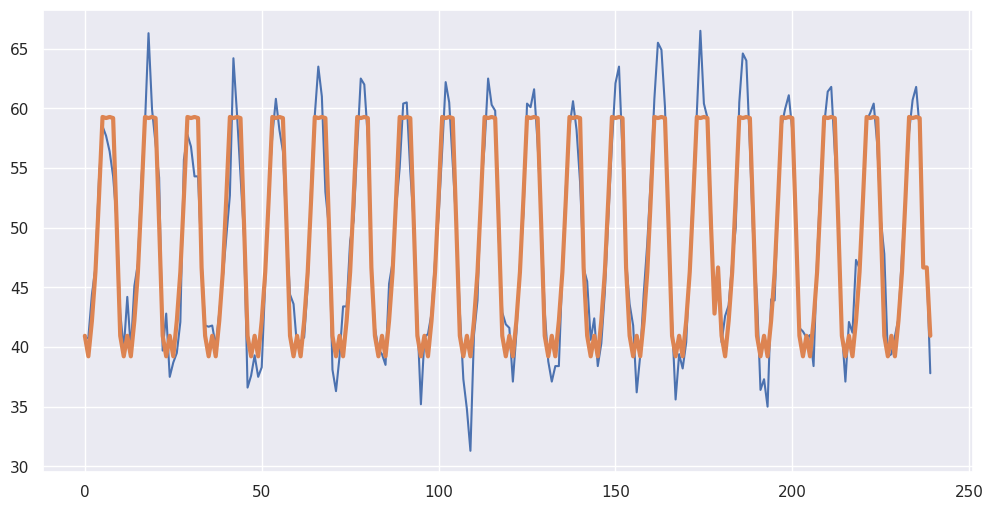

In [ ]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

Как мы видим, предсказания неидеальны.

#Вывод

В ходе этой работы мы исследовали Марковские процессы на примере работе с текстом и временными рядами